# Implement a KNN model for glass classification

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Load Dataset

In [2]:
glass = pd.read_csv('glass.csv')

In [3]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


#### EDA on dataset

In [4]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [6]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
glass.shape

(214, 10)

In [9]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [10]:
len(glass.columns)

10

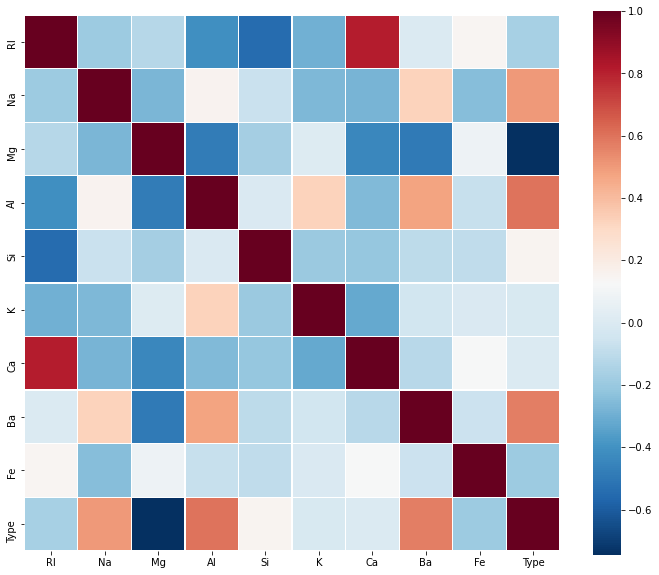

In [11]:
# Correlation
corr = glass.corr()
fig, axs = plt.subplots(1, figsize = (12, 10))
sns.heatmap(corr, square = True, linewidths = .3, cmap = "RdBu_r")
plt.show()

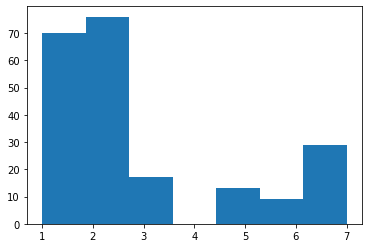

In [12]:
plt.hist(glass.Type, bins = 7)
plt.show()

In [13]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

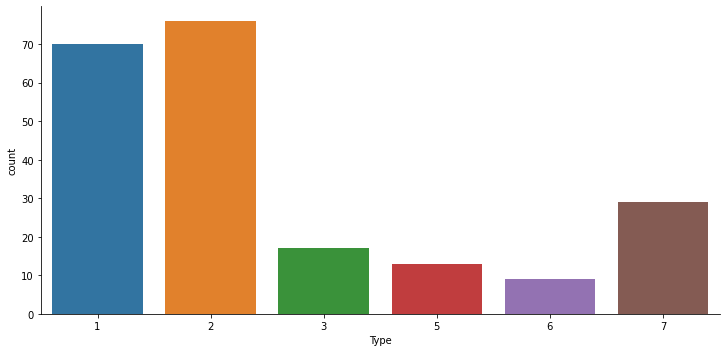

In [14]:
sns.catplot('Type', data = glass, kind = "count", height = 5, aspect = 2)

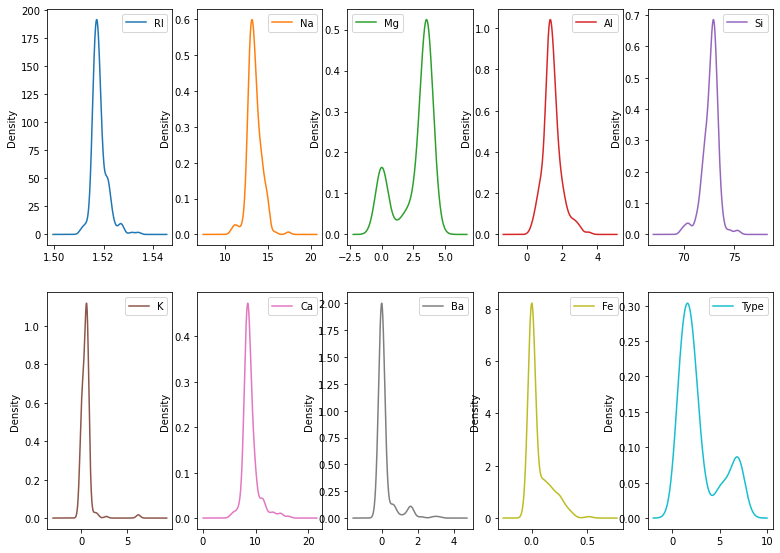

In [15]:
glass.plot(kind = 'density', subplots = True, layout = (4, 5), figsize = (13, 20), sharex = False, sharey = False)
plt.show()

#### Split the data into Train and Test data

In [16]:
# Exclude Animal Name column for this
# Assign Type column to Y and other columns to X
X = glass.iloc[:, 1:len(glass.columns) - 1]
y = glass.Type

Train_X, Test_X, Train_y, Test_y = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
Train_X

,Na,Mg,Al,Si,K,Ca,Ba,Fe
111,11.02,0.00,0.75,73.08,0.00,14.96,0.0,0.00
159,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09
24,13.38,3.50,1.15,72.85,0.50,8.43,0.0,0.00
30,12.65,3.56,1.30,73.08,0.61,8.69,0.0,0.14
60,13.60,3.62,1.11,72.64,0.14,8.76,0.0,0.00
...,...,...,...,...,...,...,...,...
67,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17
192,14.20,0.00,2.79,73.46,0.04,9.04,0.4,0.09
117,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00
47,13.99,3.70,0.71,71.57,0.02,9.82,0.0,0.10


In [18]:
Train_y

111    2
159    3
24     1
30     1
60     1
      ..
67     1
192    7
117    2
47     1
172    5
Name: Type, Length: 149, dtype: int64

In [19]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [20]:
# K = 7 as species are 7 -> Initiating the Learning Model
knn = KNeighborsClassifier(n_neighbors = 7)

In [21]:
knn.fit(Train_X, Train_y)

KNeighborsClassifier(n_neighbors=7)

In [22]:
# Predict the Test Set results
knn_pred = knn.predict(Test_X)

In [23]:
# Accuracy score
conf_matrix_knn = confusion_matrix(Test_y, knn_pred)
print(conf_matrix_knn)

[[16  5  0  0  0  0]
 [ 7 18  0  1  0  0]
 [ 7  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 1  0  0  0  0  6]]


In [24]:
acc = accuracy_score(Test_y, knn_pred) * 100
print("Accuracy of our model = " +str(round(acc, 2)) + "%")

Accuracy of our model = 66.15%


In [25]:
# Visualization using Andrew Curves
from pandas.plotting import andrews_curves

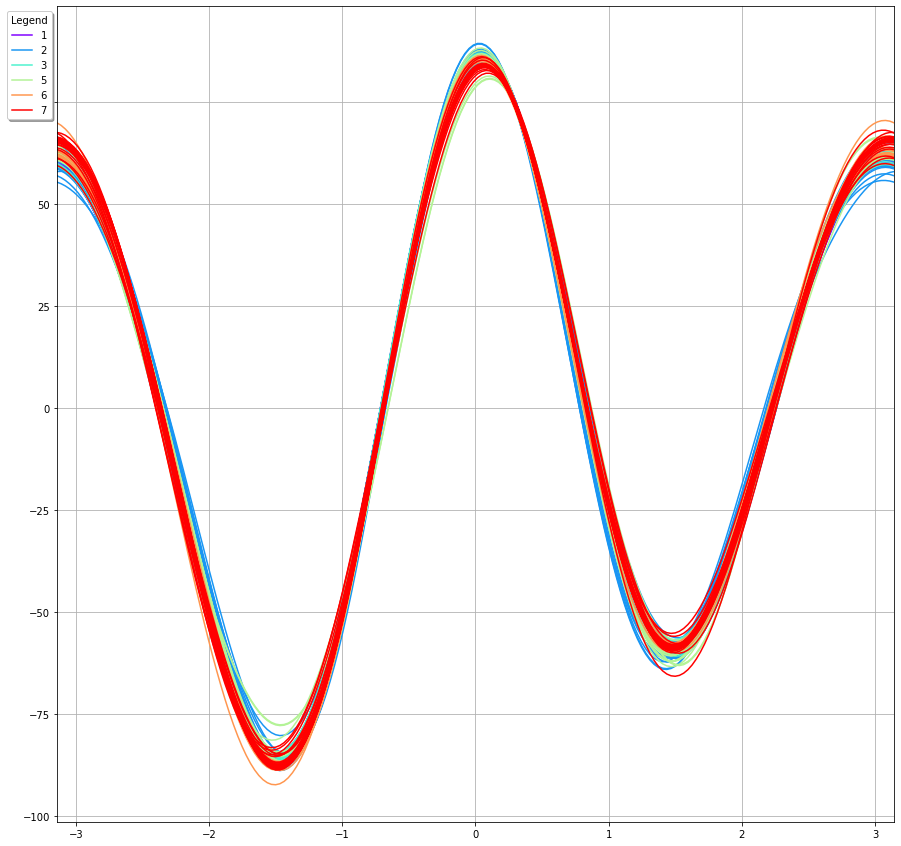

In [26]:
fig = plt.figure(figsize = (15, 15))

andrews_curves(glass, "Type", colormap = 'rainbow')

plt.legend(loc = "upper right", bbox_to_anchor = [0, 1], ncol = 1, shadow = True, title = "Legend", fancybox = True)

plt.show()

In [27]:
# Using Cross-Validation for parameter tuning for KNN
K_values = list(range(1, 20, 2))
K_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [28]:
# Create Cross-Validation scores
cv = []
cv_scores = []

In [29]:
# Perform 10 cross validation
for k in K_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Train_X, Train_y.values)
    score = cross_val_score(knn, Train_X, Train_y, cv = 2, scoring = 'accuracy')
    cv_scores.append(score.mean())

In [30]:
# Misclassification Errors (MSE)
MSE = [1 - x for x in cv_scores]

In [31]:
MSE

[0.301981981981982,
 0.3622522522522522,
 0.3757657657657658,
 0.38900900900900903,
 0.38225225225225223,
 0.395945945945946,
 0.395945945945946,
 0.4027027027027027,
 0.4296396396396396,
 0.4227027027027026]

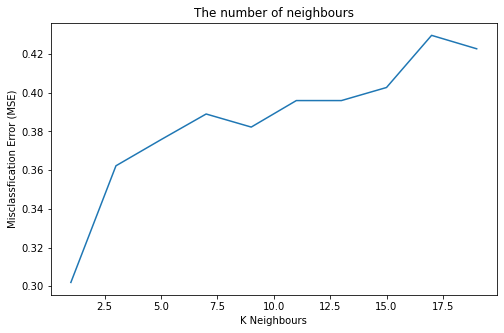

In [32]:
plt.figure(figsize = (8, 5))
plt.title("The number of neighbours")
plt.xlabel("K Neighbours")
plt.ylabel("Misclassfication Error (MSE)")
plt.plot(K_values, MSE)
plt.show()